# Module 03: EDA

In [1]:
# packages
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split 
from ISLP import load_data

# set seed
seed = 2323

### We'll use the _Hitters_ data from ISLP for this activity. The metadata for _Hitters_ can be found [here](https://intro-stat-learning.github.io/ISLP/datasets/Hitters.html).

In [2]:
# Load the data
Hitters = load_data('Hitters')


### Determine the number of rows and columns in the dataset by returning its "shape" attribute

In [3]:
#fillin
Hitters.shape

(322, 20)

### Determine whether each feature is numeric or categorical by returning the "dtype" attribute for each column

In [4]:
for col in Hitters.columns:
    print(col, Hitters[col].dtypes)
    

AtBat int64
Hits int64
HmRun int64
Runs int64
RBI int64
Walks int64
Years int64
CAtBat int64
CHits int64
CHmRun int64
CRuns int64
CRBI int64
CWalks int64
League category
Division category
PutOuts int64
Assists int64
Errors int64
Salary float64
NewLeague category


### Before doing any other analyses, let's create training and test sets.

In [5]:
Train, Test = train_test_split(Hitters, 
                               random_state=seed, 
                               test_size=0.40, 
                               shuffle=True) 

### Based on the metadata, what is the difference between the 6 columns starting with 'C' and the 6 related columns that don't?

#fillin Type your answer here
If it has a c before it then that number is the data taken throughout his whole career and if it doesn't it is just from one year 1986.

### On the training set, create pairwise scatterplots for each of these 6 columns with the 'Salary' variable.

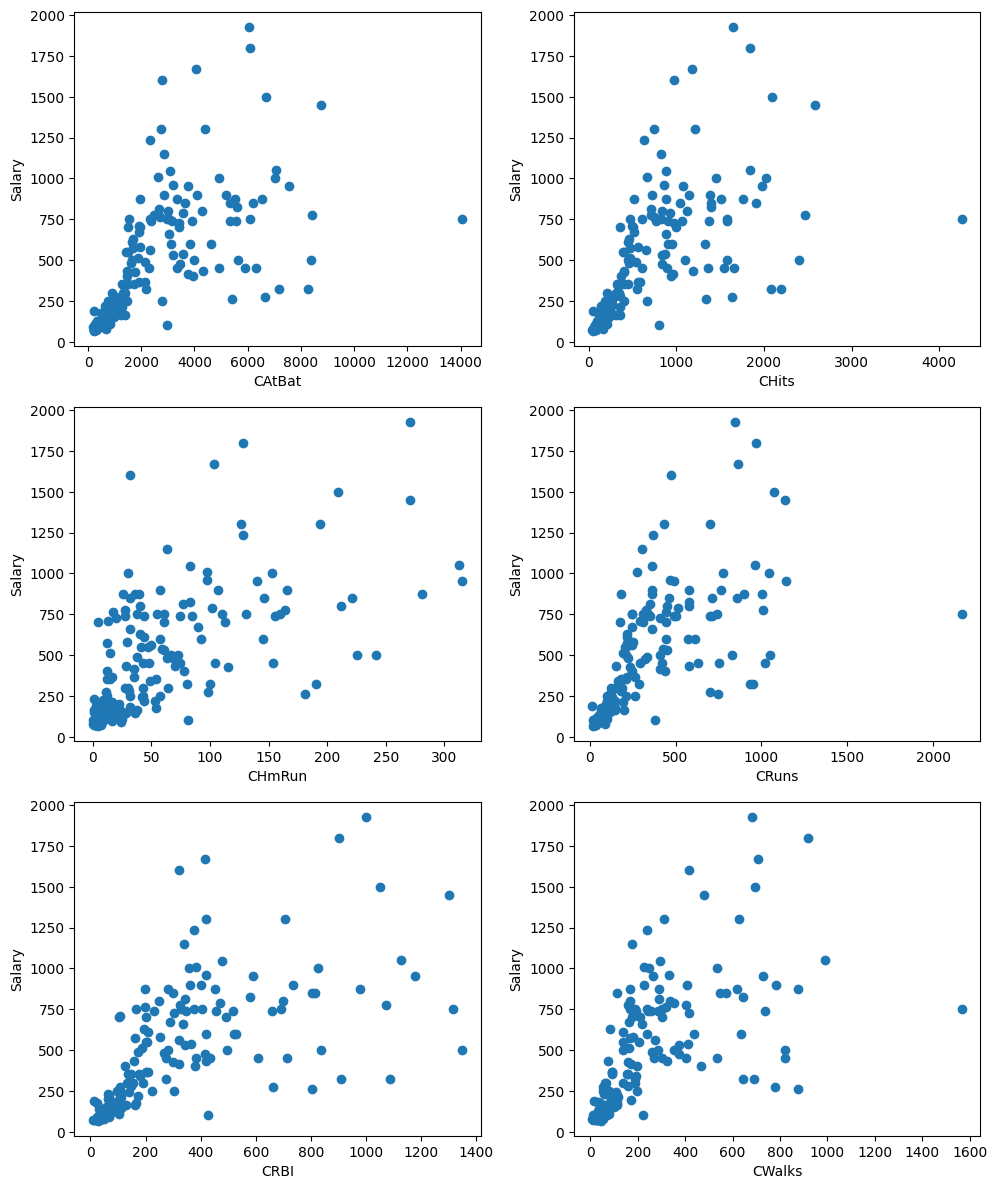

In [57]:
#fillin
import matplotlib.pyplot as plt

subset = ['CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks']

fig, axes = plt.subplots(3, 2, figsize=(10, 12))

axes = axes.flatten()

for i, col in enumerate(subset):
    axes[i].scatter(Train[col], Train['Salary'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Salary')

plt.tight_layout()
plt.show()



### Use the "describe" method to determine the mean, standard deviation, and 5 number summary of all numeric variables in the training subset of _Hitters_.

In [13]:
#fillin
numeric = Train.select_dtypes(include=['number'])
numeric.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,164.000000
mean,381.829016,101.549223,10.150259,50.751295,47.093264,38.445596,7.253886,2587.440415,702.222798,59.668394,345.378238,308.373057,248.388601,276.865285,105.300518,8.051813,493.032951
std,145.679181,44.267521,8.228711,24.784284,24.912589,21.136915,4.858712,2285.947344,649.010165,66.449102,322.848870,297.885894,250.777436,262.957701,137.135778,6.783667,386.159522
min,19.000000,7.000000,0.000000,1.000000,2.000000,1.000000,1.000000,41.000000,13.000000,0.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,67.500000
25%,271.000000,68.000000,4.000000,32.000000,29.000000,22.000000,3.000000,730.000000,185.000000,14.000000,98.000000,82.000000,63.000000,109.000000,7.000000,3.000000,160.000000
50%,369.000000,95.000000,8.000000,47.000000,43.000000,34.000000,6.000000,1876.000000,476.000000,36.000000,238.000000,202.000000,166.000000,211.000000,38.000000,6.000000,420.833500
75%,508.000000,136.000000,14.000000,68.000000,61.000000,53.000000,11.000000,3754.000000,1000.000000,78.000000,494.000000,419.000000,332.000000,317.000000,173.000000,12.000000,750.000000
max,687.000000,223.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,315.000000,2165.000000,1348.000000,1566.000000,1320.000000,492.000000,32.000000,1925.571000


### It looks like the mean and median of 'AtBat' are nearly equal. This _might_ suggest that this variable is normally distributed. Create a histogram of 'AtBat' to check this hypothesis.

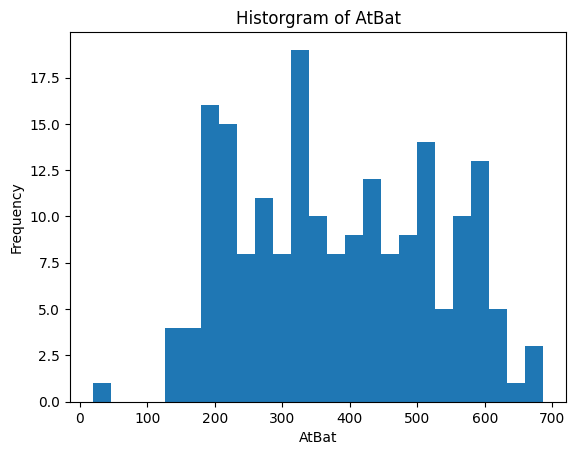

In [15]:
#fillin
plt.hist(Train['AtBat'], bins = 25)
plt.xlabel('AtBat')
plt.ylabel('Frequency')
plt.title('Historgram of AtBat')
plt.show()

### Let's standardize the AtBat feature (i.e., normalize by z-scores). We'll create a new column in the training data called 'AtBat_st' to represent this.

In [ ]:
#fillin
mean_atbat= Train['AtBat'].mean()
std_atbat = Train['AtBat'].std()

Train['AtBat_st'] = (Train['AtBat'] - mean_atbat) / std_atbat

Train['AtBat_st'].describe()



count    1.930000e+02
mean    -2.761176e-17
std      1.000000e+00
min     -2.490603e+00
25%     -7.607746e-01
50%     -8.806348e-02
75%      8.660880e-01
max      2.094815e+00
Name: AtBat_St, dtype: float64

### How many rows have an 'AtBat' value within the first standard deviation?

Hint: the 'len' magic method returns the number of rows of a dataFrame.

In [ ]:
#fillin
within_1ststd = Train[(Train['AtBat_st'] >= -1) & (Train['AtBat_st'] <= 1)]
print(len(within_1ststd))


115


### Going back to the results of the 'describe' method, how can you tell that the 'Salary' variable has missing values?

#fillin Type your answer here.
You can tell Salary has missing values because its count in the .describe output is smaller than the total nuber of rows in the dataset

### Describe a situation where a variable could have missing values but this would not be reflected in the results of the 'describe' method.

#fillin Type your answer here.
If a column is non-numeric it will be excluded from .describe or if missing values are stored as placeholders like NA instead if NaN.

### On the training data, create separate boxplots of the 'AtBat' variable for when 'Salary' is populated or missing.

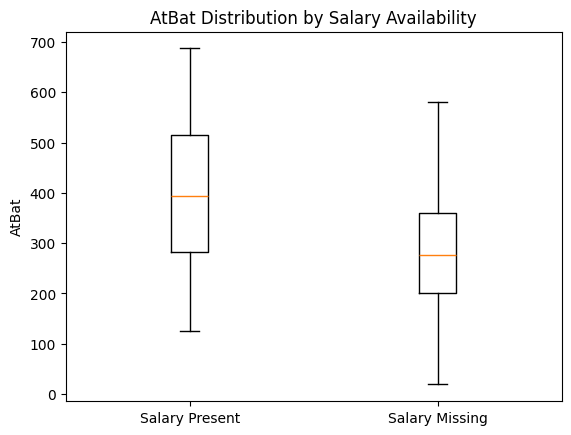

In [27]:
#fillin
atbat_with_salary = Train[Train['Salary'].notna()]['AtBat']
atbat_missing_salary = Train[Train['Salary'].isna()]['AtBat']

plt.figure()
plt.boxplot([atbat_with_salary, atbat_missing_salary],
            tick_labels = ['Salary Present', 'Salary Missing'])
plt.ylabel('AtBat')
plt.title('AtBat Distribution by Salary Availability')

plt.show()

### Create a correlation matrix for all numeric features in the training set

In [28]:
#fillin
Train_numeric = Train.select_dtypes(include=['number'])
corr_matrix = Train_numeric.corr()
corr_matrix

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,AtBat_St
AtBat,1.000000,0.963324,0.540323,0.906579,0.798717,0.631824,-0.039232,0.126602,0.146763,0.150166,0.164892,0.145779,0.056578,0.345879,0.363085,0.368162,0.401390,1.000000
Hits,0.963324,1.000000,0.516853,0.914739,0.795316,0.605876,-0.028717,0.133316,0.163329,0.136865,0.175542,0.153011,0.065178,0.312858,0.310422,0.301725,0.432558,0.963324
HmRun,0.540323,0.516853,1.000000,0.618439,0.840613,0.385425,0.009072,0.078981,0.076914,0.411917,0.110767,0.218285,0.080296,0.222084,-0.069088,0.062840,0.326021,0.540323
Runs,0.906579,0.914739,0.618439,1.000000,0.786635,0.711346,-0.069584,0.083770,0.103859,0.160979,0.159683,0.115628,0.099025,0.289952,0.184714,0.217297,0.441499,0.906579
RBI,0.798717,0.795316,0.840613,0.786635,1.000000,0.553527,0.046705,0.165837,0.180526,0.375072,0.191452,0.285074,0.117109,0.323825,0.138896,0.217983,0.414623,0.798717
Walks,0.631824,0.605876,0.385425,0.711346,0.553527,1.000000,0.037943,0.137157,0.147019,0.194766,0.205250,0.167453,0.312812,0.317000,0.139008,0.160753,0.458462,0.631824
Years,-0.039232,-0.028717,0.009072,-0.069584,0.046705,0.037943,1.000000,0.925308,0.906857,0.730478,0.882559,0.882835,0.836809,0.071301,-0.091915,-0.160476,0.541390,-0.039232
CAtBat,0.126602,0.133316,0.078981,0.083770,0.165837,0.137157,0.925308,1.000000,0.995185,0.775167,0.979705,0.948617,0.894573,0.120875,-0.000507,-0.068187,0.616677,0.126602
CHits,0.146763,0.163329,0.076914,0.103859,0.180526,0.147019,0.906857,0.995185,1.000000,0.761920,0.983128,0.945002,0.883547,0.132818,-0.003372,-0.062669,0.629875,0.146763
CHmRun,0.150166,0.136865,0.411917,0.160979,0.375072,0.194766,0.730478,0.775167,0.761920,1.000000,0.782490,0.912134,0.750795,0.126756,-0.129640,-0.141514,0.616170,0.150166


### Propose two different ways of imputing the missing values of Salary while taking advantage of the information given in the boxplots or the correlation matrix.

#fillin Type your answer here.
1.regression-based imputation when salary is predicted using correlated variables identified in the correlation matrix.
2.Group-based median imputation where missing Salary variables are instead replaced with median salary number that was given from the boxplot. 

### For our last exercise, we'll explore Hits and Walks relative to AtBat totals. 
- Use the sum function to calculuate the totals of each of these three variables for the 1986 season (on the training set). 
- Create a pie chart which shows total hits, total walks, and remaining total (neither) as percents of the At Bats total (on the training set). 

In [34]:
TotHits = Train['Hits'].sum()
TotWalks = Train['Walks'].sum()
TotAtBat = Train['AtBat'].sum()

Labels = ['Hits', 'Walks', 'Neither']
Totals = [TotHits, TotWalks, TotAtBat-TotHits-TotWalks]

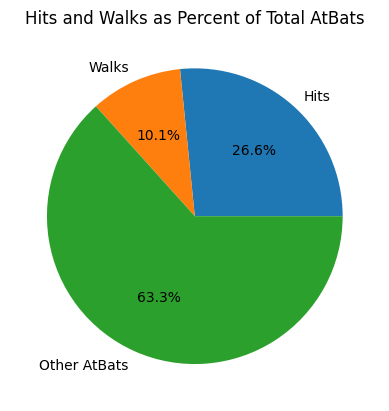

In [36]:
# pie chart
labels = ['Hits', 'Walks', 'Other AtBats']
plt.figure()
plt.pie(Totals, labels=labels, autopct ='%1.1f%%')
plt.title('Hits and Walks as Percent of Total AtBats')
plt.show()

### The previous two cells gave us totals across all players. For each player in the training set, calculate the Hits as a percent of AtBat and store it in a new variable called 'AVG'

In [45]:
#fillin
Train['AVG'] = (Train['Hits'] / Train['AtBat']) 
Train[['Hits', 'AtBat', 'AVG']].head()


,Hits,AtBat,AVG
3,141,496,0.284274
63,53,216,0.245370
27,129,474,0.272152
130,104,306,0.339869
93,138,511,0.270059


### Using 0.25 and 0.31 as the split points, create a new variable with three bins: high, medium, and low. 

In [58]:
Train['AVG_bin'] = 'medium'

Train.loc[Train['AVG'] < 0.25, 'AVG_bin'] = 'low'
Train.loc[Train['AVG'] > 0.31, 'AVG_bin'] = 'high'


### Create a bar chart that displays the number of players in each of the low, medium, and high categories (for the training data).

Text(0.5, 1.0, 'Number of Players by AVG Category')

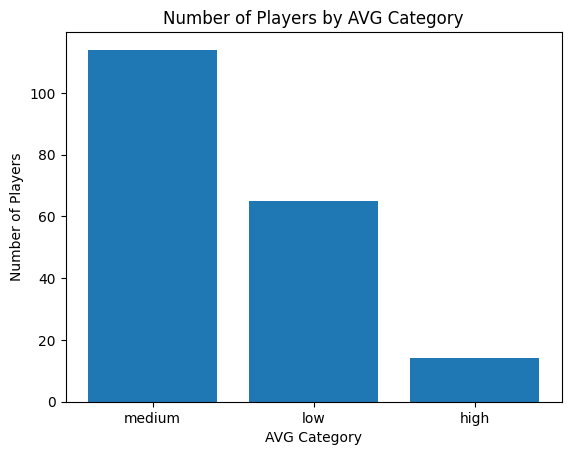

In [59]:

counts = Train['AVG_bin'].value_counts()

plt.figure()
plt.bar(counts.index, counts.values)

plt.xlabel('AVG Category')
plt.ylabel('Number of Players')
plt.title('Number of Players by AVG Category')


Notice that the order of the bars will be medium, low, high. That's counterintuitive. We can reorder these quickly. 

In [53]:
indexMap = ['low', 'medium', 'high']
reordered_list = [Train['AVG_bin'].value_counts()[i] for i in indexMap]

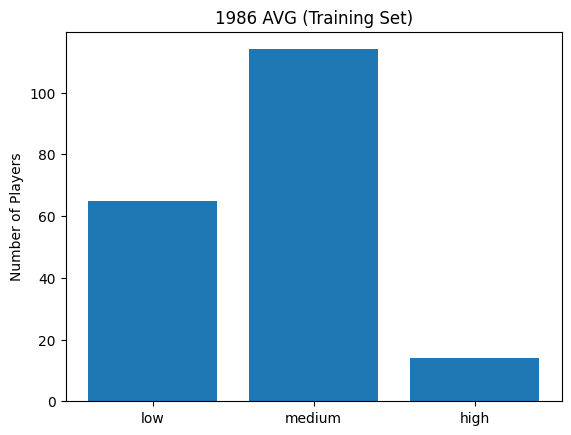

In [55]:
plt.bar([0,1,2], reordered_list)

plt.title("1986 AVG (Training Set)")
plt.ylabel("Number of Players")

plt.xticks([0,1,2], indexMap)

plt.show()

### Did we use the depth method or width method for creating these bins? Explain.

#fillin Type your answer here.
Width-based binning because we split the data based on numeric values and not on the number of observations.